# Text Preprocessing

## Natural Language Toolkit
http://www.nltk.org/

NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

## TextBlob

https://textblob.readthedocs.io/en/dev/

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

## Pattern

http://www.clips.ua.ac.be/pages/pattern-en

The pattern.en module contains a fast part-of-speech tagger for English (identifies nouns, adjectives, verbs, etc. in a sentence), sentiment analysis, tools for English verb conjugation and noun singularization & pluralization, and a WordNet interface.

## spaCy

https://spacy.io/

spaCy is a Python library good for preparing text for deep learning. It interoperates seamlessly with TensorFlow, Keras, Scikit-Learn, Gensim and the rest of Python's awesome AI ecosystem. It's written from the ground up in carefully memory-managed Cython. For text preprocessing, it provides tokenization, syntax-driven sentence segmentation, pre-trained word vectors, part-of-speech tagging, named entity recognition, labelled dependency parsing.

## TextBlob
### Tokenization

In [36]:
from textblob import TextBlob
from textblob import Word

In [7]:
question = TextBlob(u"What is the step by step guide to invest in share market in india?")
question.words

WordList(['What', 'is', 'the', 'step', 'by', 'step', 'guide', 'to', 'invest', 'in', 'share', 'market', 'in', 'india'])

#### Lemmatization
Normalization of any word token to its lemma, i.e. a word base form: children --> child.

In [15]:
#Let's lemmatize each token in the sentence below
question = TextBlob(u"Does the United States government still blacklist (employment, etc.) some United States citizens because their political views?")
question.words.lemmatize()

WordList(['Does', 'the', 'United', 'States', 'government', 'still', 'blacklist', 'employment', 'etc', 'some', 'United', 'States', 'citizen', 'because', 'their', 'political', 'view'])

#### Stemming
Reducing words to their pseudo (i.e. not necessarily grammatically correct) stem: characterisation --> characteris. 
There are several stemming algorithms in the NLTK library: Porter Stemmer (default), Snowball Stemmer, Lancaster Stemmer.

The overstemming issue should be kept in mind.
For example, the widely used Porter Stemmer normalizes "universal", "university", and "universe" to "univers". 
These words are in different domains, so treating them as equals will likely reduce the relevance of many NLP tasks.



In [16]:
#Let's do the stemming for our sentence with the Porter Stemmer.
question.words.stem()

WordList(['doe', 'the', 'unit', 'state', 'govern', 'still', 'blacklist', 'employ', 'etc', 'some', 'unit', 'state', 'citizen', 'becaus', 'their', 'polit', 'view'])

### Part-of-speech Tagging
Default NLTK and Textblob POS tags explained:
http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [24]:
#Let's define POS tags for our sentence with the default NLTK Tagger
question.pos_tags

[('Does', 'VBZ'),
 ('the', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('government', 'NN'),
 ('still', 'RB'),
 ('blacklist', 'VB'),
 ('employment', 'NN'),
 ('etc', 'FW'),
 ('some', 'DT'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('citizens', 'NNS'),
 ('because', 'IN'),
 ('their', 'PRP$'),
 ('political', 'JJ'),
 ('views', 'NNS')]

In [25]:
from spacy.en import English
parser = English()

In [27]:
question = "Does the United States government still blacklist (employment, etc.) some United States citizens because their political views?"
parsedSentence = parser(question)
for token in parsedSentence:
    print(token.orth_, token.pos_, token.lemma_)

Does VERB do
the DET the
United PROPN united
States PROPN states
government NOUN government
still ADV still
blacklist NOUN blacklist
( PUNCT (
employment NOUN employment
, PUNCT ,
etc X etc
. PUNCT .
) PUNCT )
some DET some
United PROPN united
States PROPN states
citizens NOUN citizen
because ADP because
their ADJ their
political ADJ political
views NOUN view
? PUNCT ?


### Stopword Detection

In [28]:
#Let's access the NLTK stopword list
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [29]:
#Let's compute what amount of words in our example sentence is not in the stopwords list:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)
tokens = nltk.word_tokenize(question)
content_fraction(tokens)

0.7727272727272727

### Semantic Word Relations: WordNet

Try it online: http://wordnetweb.princeton.edu/perl/webwn

In [39]:
from nltk.corpus import wordnet

In [32]:
# First, let's see what are the synsets for a given word
word = Word("funny")
word.synsets

[Synset('funny_story.n.01'),
 Synset('amusing.s.02'),
 Synset('curious.s.01'),
 Synset('fishy.s.02'),
 Synset('funny.s.04')]

In [33]:
#Then let's explore meanings of the word
word.definitions

['an account of an amusing incident (usually with a punch line)',
 'arousing or provoking laughter',
 'beyond or deviating from the usual or expected',
 'not as expected',
 'experiencing odd bodily sensations']

In [37]:
from textblob.wordnet import VERB
from textblob.wordnet import NOUN
# Let's narrow the synset search to a certain part of speech
word = Word("order")
word.get_synsets(pos=VERB)
#Try other option: pos=NOUN

[Synset('order.v.01'),
 Synset('order.v.02'),
 Synset('order.v.03'),
 Synset('regulate.v.02'),
 Synset('order.v.05'),
 Synset('order.v.06'),
 Synset('ordain.v.02'),
 Synset('arrange.v.07'),
 Synset('rate.v.01')]

In [40]:
#Let's get a parent for a given word in a certain meaning 
word = wordnet.synset('order.v.01')
word.hypernyms()

[Synset('request.v.02')]

In [41]:
# #Let's find out what are the children for a given word in a certain meaning 
word.hyponyms()

[Synset('call.v.05'),
 Synset('command.v.02'),
 Synset('direct.v.01'),
 Synset('instruct.v.02'),
 Synset('warn.v.03')]

In [49]:
from nltk.corpus import sentiwordnet as swn

# For a given word in a certain meaning let's find out its polarity assigned
word = swn.senti_synset('amusing.s.02')
print(word)
print(word.pos_score())

<amusing.s.02: PosScore=0.5 NegScore=0.0>
0.5


## Further Reading

1. Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit. Steven Bird, Ewan Klein, and Edward Loper (http://www.nltk.org/book/)
2. TextBlob: Simplified Text Processing (https://textblob.readthedocs.io/en/dev/index.html)
3. Spacy Documentation (https://spacy.io/docs/usage/)
4. Intro to NLP with spaCy (https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)

# Feature engineering

## Basics of Textual Features
We can't use raw text as an input of our algorithms, firstly we should trasform it into some numerical format (to form feature vectors).

In Natural Language Processing automated feature extraction may be achieved in many ways <strong>(bag-of-words, word embeddings, graph-based representations etc.)</strong>

## Bag-of-Words Approach
### Intuition Behind the Model. Word Counters.

In bag-of-words approach we work under the following assumptions:
<ul>
    <li> The text can be analyzed without taking into account the word/token order </li>
    <li> We only need to know what words/tokens the text consists of and how many times we met them </li>
</ul>

More formal, given the collection of texts $T_1, T_2, ... , T_n$, we extract unique tokens $w_1, w_2, ..., w_m$ to form a dictionary.

Thus, each text $T_i$ is represented by feature vector $F_j = \{x_{ij},\ j \in [1,m]\}$, where $x_{ij}$ corresponds to number of occurences of word $w_j$ in text $T_i$

Say, out corpus only consists of **2 texts**:

["I love data science", 
"A data scientist is often smarter than a data analyst"]

Suppose our tokens are simple unigrams (words), therefore there are **11 unique words**: {i, love, data, science, a, scientist, is, often, smarter, than, analyst}

Then, our corpus is mapped to feature vectors $T_1=(1,1,1,1,0,0,0,0,0,0,0)$, $T_2=(0,0,2,0,2,1,1,1,1,1,1)$

|Text|i|love|data|science|a|scientist|is  |often|smarter|than|analyst|
|------|------|------|------|------|------|------|------|------|------|------|------|
|$T_1$|1|1|1|1|0|0|0|0|0|0|0|
|$T_2$|0|0|2|0|2|1|1|1|1|1|1|

Well, how memory-effective this approach is?
If n == 20k, this textual corpus might spawn a dictionary with around 100k elements. 
<br>Thus, storing X as an array of type **int32** would require 20000 x 100000 x 4 bytes ~ **8GB in RAM** which is barely manageable on today’s computers.

Fortunately, **most values in X will be zeros** since for a given sentence less than hundred of distinct words will be used. For this reason we say that bags of words are **typically high-dimensional sparse datasets**. We can save a lot of memory by only storing the non-zero parts of the feature vectors in memory.
Sparse matrices are data structures that do exactly this, and scikit-learn has built-in support for these structures.

<h2 style="font-size:20px; font-family:Verdana; color: #003300" align="left"> PROS: </h2>
* Very intuitive approach, easy to understand and apply
* Built-in support in sklearn
* Memory-efficient sparse format, acceptable by most algorithms 
* Despite its simplicity, works well, good results could be reached
* Fast preprocessing, even on 1 core

<h2 style="font-size:20px; font-family:Verdana; color: #680000" align="left"> CONS: </h2>
* Huge corpus usually leads to huge vocabulary size (and ngrams), even sparse format wouldn't help you (only hashing tricks)
* There are other more complex approaches (**tf-idf**, **word-embeddings**, etc) 
* A bag of words is an orderless representation: throwing out spatial relationships between features leads to the fact that simplified model cannot let us to distinguish between sentences, built from the same words while having opposite meanings:
<br>"New episodes **don't** feel like the first - watch it!" (positive)
<br>"New episodes feel like the first - **don't** watch it!" (negative)
<br>**However, it is somehow treated by increasing the "length" of the token (unigrams $\rightarrow$ bigrams, n-grams etc.), gluing negative particles with next word (not like $\rightarrow$ not_like), using character n-grams, skip-grams etc.** (see [this section for n-grams details](#3_5))

### Capturing Dependencies. N-grams

Simple Bag-of-Words(BoW) model, built on simple tokens (unigrams), is too simplified and catch no spatial dependencies.
<br>N-gram is a sequence of $N$ basic tokens. 
<br>N-grams can be defined in different ways, based on token definition. ('word', 'character', 'character_wb' etc.)

1) **Word n-grams: (to catch more semantics)** 
* unigrams: 'I love data science' $\rightarrow$ [i, love, data, science]
* bigrams (2-grams): 'I love data science' $\rightarrow$ [i love, love data, data science]
* 3-grams: 'I love data science' $\rightarrow$ [i love data, love data science]
* ...

2) **Character n-grams: (allows to catch features like ":)", deal somehow with misspeled words like "looong" etc.)**
* 5-grams: 'I love data science' $\rightarrow$ ["i lov", " love", ... , "cienc", "ience"]
* ...

3) **Character-wb n-grams (n-grams, only in word boundaries):**
* 5-grams: 'I love data science' $\rightarrow$ {" i ", " love", "love ", ... , "cienc", "ience"]
* ...

4) **Skip-n-grams or k-skip-n-grams (both character- and word-based, extends spatial dependencies)**
* A sequence of $N$ basic tokens, having distance of $\leq K$ tokens between them
* 1-skip-2-grams: 'I love data science' $\rightarrow$ [i data, love science]
* ...
 
<h2 style="font-size:20px; font-family:Verdana; color: #003300" align="left"> PROS: </h2>

The same as in Bag-of-Words + more context can be captured

<h2 style="font-size:20px; font-family:Verdana; color: #680000" align="left"> CONS: </h2>

Don't forget that with the increase of n-gram range the vocabulary **rapidly grows up**!
<br>**|(1,1)-grams| << |(1,2)-grams| << |(1,3)-grams| << ...**
<br>where (1,1)-grams = unigrams, (1,2)-grams = unigrams AND bigrams, etc.

<hr style="border: 1px dashed #ffffff;" />
### CountVectorizer

CountVectorizer in Sklearn implements aforementioned Bag-of-Words approach:

**Commonly used parameters:**
* **analyzer**={‘word’, ‘char’, ‘char_wb’} - what token to use (word, char-n-grams etc.)
* **tokenizer**=own tokinezer
* **ngram_range**=(min_n, max_n) - what N to use: say, ngram_range=(1,2) $\rightarrow$  use both unigrams and bigrams
* **stop_words**={‘english’, list_of_words, or None} - whether to filter stop-words or not
* **vocabulary**={None, your_own_dictionary} - whether to use given vocabulary or to build it from extracted tokens
* **max_features**={N, None} - to build a vocabulary that consider **top-N** terms ordered by term frequency (TF) across the corpus

In [70]:
# import CountVectorizer from sklearn library
from sklearn.feature_extraction.text import CountVectorizer

# create CountVectorizer object
cv = CountVectorizer(
                    analyzer='word', # token = word
                    ngram_range=(1,1), # only unigrams are used, (1,2) - unigrams/bigrams, ..., etc.
                    stop_words=stopwords.words('english'), # or stop_words='english'
                    vocabulary=None, # or vocabulary=your_own_dictionary
                    max_df=1.0, # don't filter words by their frequency
                    max_features=15 # only top-15 words will be used as columns
                    )

In [71]:
import pandas as pd
df = pd.read_csv("train.csv", nrows=5)
df.question1.values

array(['What is the step by step guide to invest in share market in india?',
       'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
       'How can I increase the speed of my internet connection while using a VPN?',
       'Why am I mentally very lonely? How can I solve it?',
       'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?'], dtype=object)

In [72]:
# apply CountVectorizer to text corpus
transformed_texts_cv = cv.fit_transform(df.question1.values[:3])
# convert sparse representation of transformed texts to dense format and explore it
print('Obtained feature matrix X:')
print(transformed_texts_cv.todense(), '\n')

Obtained feature matrix X:
[[0 0 1 0 1 0 1 0 1 0 1 0 2 0 0]
 [0 1 0 0 0 0 0 1 0 1 0 0 0 1 0]
 [1 0 0 1 0 1 0 0 0 0 0 1 0 0 1]] 



In [73]:
# print dictionary (sorted by column index) to see mapping between indices/columns and words 
print('Dictionary:')
for k,v in sorted(cv.vocabulary_.items(), reverse=False):
    print('column index:{}, token: {}'.format(v,k))

Dictionary:
column index:0, token: connection
column index:1, token: diamond
column index:2, token: guide
column index:3, token: increase
column index:4, token: india
column index:5, token: internet
column index:6, token: invest
column index:7, token: kohinoor
column index:8, token: market
column index:9, token: noor
column index:10, token: share
column index:11, token: speed
column index:12, token: step
column index:13, token: story
column index:14, token: using


In [74]:
# transform new sentences (having CountVectorizer trained)
new_transformed = cv.transform(df.question1.values[3:])
print('\nNew sentence (transformed):')
print(new_transformed.todense(), '\n')


New sentence (transformed):
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]] 



In [76]:
df.question1.values

array(['What is the step by step guide to invest in share market in india?',
       'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
       'How can I increase the speed of my internet connection while using a VPN?',
       'Why am I mentally very lonely? How can I solve it?',
       'Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?'], dtype=object)

#### More details about CountVectorizer in Sklearn: <br> http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### Exersize
Create your own tokenizer with Textblob stemming.

In [87]:
import re
def tokenize(text):
    # YOUR CODE
    return text

In [88]:
cv = CountVectorizer(
                    analyzer='word', # token = word
                    ngram_range=(1,1), # only unigrams are used, (1,2) - unigrams/bigrams, ..., etc.
                    tokenizer=tokenize,
                    stop_words=stopwords.words('english'), # or stop_words='english'
                    vocabulary=None, # or vocabulary=your_own_dictionary
                    max_df=1.0, # don't filter words by their frequency
                    max_features=15 # only top-15 words will be used as columns
                    )
# apply CountVectorizer to text corpus
transformed_texts_cv = cv.fit_transform(df.question1.values[:3])
# convert sparse representation of transformed texts to dense format and explore it
print('Obtained feature matrix X:')
print(transformed_texts_cv.todense(), '\n')

Obtained feature matrix X:
[[13  0  1  0  7  0  1  3  1  4  2  2  1  1  1]
 [ 7  2  1  0  1  1  0  4  2  3  0  3  0  0  1]
 [13  0  1  4  9  1  1  3  0  9  2  2  1  1  2]] 



In [89]:
# print dictionary (sorted by column index) to see mapping between indices/columns and words 
print('Dictionary:')
for k,v in sorted(cv.vocabulary_.items(), reverse=False):
    print('column index:{}, token: {}'.format(v,k))

Dictionary:
column index:0, token:  
column index:1, token: -
column index:2, token: ?
column index:3, token: c
column index:4, token: e
column index:5, token: f
column index:6, token: g
column index:7, token: h
column index:8, token: k
column index:9, token: n
column index:10, token: p
column index:11, token: r
column index:12, token: u
column index:13, token: v
column index:14, token: w


<details>
  <summary>Click to see answer</summary>
  <img alt="Smiley face" align="left" src="http://1.1m.yt/_FT_6m0.png">
  <p align='left'>Are you sure you tried to solve it on your own?</p>
      <pre>
          <code>
              word_list = TextBlob(text)
              return word_list.words.stem()
          </code>
      </pre>

</details>

## TF-IDF Augmentation. TfIdfVectorizer
In TF-IDF approach (term frequency - inverse document frequency), in addition to usual BoW-model, the following augmentation is made:
<ul>
    <li> The text can be analyzed without taking into account the word/token order </li>
    <li> We only need to know what words/tokens the text consists of and how many times we met them </li>
    <li> The more often a word/token appears in a document, the more important it is </li>
    <li> **If a word/token appears in a document, but rarely appears in other documents - it is important and vice versa: <br>if its commonly across most documents - then we cannot rely on this word to help us distinquish between texts** </li>
</ul>

Thus, we are looking on the whole corpus, usual word counters (term frequencies, TF) are weighted by IDF multiplier:

$$  \large
    \begin{cases} TF(w,T)=n_{Tw} \\ IDF(w, T)= log{\frac{N}{n_{w}}}\end{cases} \implies 
    TF\text{-}IDF(w, T) = n_{Tw}\ log{\frac{N}{n_{w}}} \ \ \ \ \forall w \in W
$$

<br>where $T$ corresponds to current document (text), 
<br>$w$ - selected word in document T, 
<br>$n_{Tw}$ - number of occurences of $w$ in text $T$, 
<br>$n_{w}$ - number of documents, containing word $w$, 
<br> $N$ - total number of documents in a corpus.

$$\large \lim_{n_{w} \to N} {TF\text{-}IDF(w, T)} = 0 $$


**Commonly used parameters:**
* **analyzer**={‘word’, ‘char’, ‘char_wb’} - what token to use (word, char-n-grams etc.)
* **ngram_range**=(min_n, max_n) - what N to use: say, ngram_range=(1,2) $\rightarrow$  use both unigrams and bigrams
* **stop_words**={‘english’, list_of_words, or None} (default) - whether to filter stop-words or not
* **vocabulary**={None, your_own_dictionary} - whether to use given vocabulary or to build it from exracted tokens
* **max_features**={N, None} - to build a vocabulary that only consider the top N ordered by term frequency across the corpus
* **norm**={‘l1’, ‘l2’ or None, optional} - norm feature vector to unit norm ($L_2-$, $L_1-$ norms)
* **smooth_idf**={True, False} Smooth idf weights by adding one to document frequencies, as if an extra document was seen containing every term in the collection exactly once. Prevents zero divisions.

In [91]:
# usage example

# import TfidfVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# create TfidfVectorizer object
tv = TfidfVectorizer(
                    analyzer='word', # token = word
                    ngram_range=(1,1), # only unigrams are used, (1,2) - unigrams/bigrams, ..., etc.
                    vocabulary=None, # or vocabulary=your_own_dictionary
                    max_df=1.0, # don't filter words by their frequency
                    max_features=15, # only top-6 words will be used as columns,
                    smooth_idf=True,
                    norm='l2' # euclidean norm is used by default
                    )

In [95]:
# apply TfidfVectorizer to text corpus
transformed_texts_tv = tv.fit_transform(df.question1.values)
# convert sparse representation of transformed texts to dense format and explore it
print('Obtained feature matrix X:')
print(transformed_texts_tv.todense(), '\n')

Obtained feature matrix X:
[[ 0.          0.          0.          0.52758638  0.26379319  0.          0.
   0.          0.          0.          0.32696486  0.          0.65392972
   0.21897218  0.26379319]
 [ 0.          0.          0.          0.          0.52064623  0.52064623
   0.          0.          0.          0.          0.          0.          0.
   0.43218341  0.52064623]
 [ 0.          0.52064623  0.52064623  0.          0.          0.52064623
   0.          0.          0.          0.          0.          0.          0.
   0.43218341  0.        ]
 [ 0.55032913  0.44400208  0.44400208  0.          0.          0.          0.
   0.          0.          0.          0.          0.55032913  0.          0.
   0.        ]
 [ 0.          0.          0.          0.37410477  0.          0.
   0.46369322  0.46369322  0.46369322  0.46369322  0.          0.          0.
   0.          0.        ]] 



In [96]:
# print dictionary (sorted by column index) to see mapping between indices/columns and words 
print('Dictionary:')
for k,v in sorted(tv.vocabulary_.items(), reverse=False):
    print('column index:{}, token: {}'.format(v,k))

Dictionary:
column index:0, token: am
column index:1, token: can
column index:2, token: how
column index:3, token: in
column index:4, token: is
column index:5, token: of
column index:6, token: one
column index:7, token: oxide
column index:8, token: quikly
column index:9, token: salt
column index:10, token: share
column index:11, token: solve
column index:12, token: step
column index:13, token: the
column index:14, token: what


In [123]:
import numpy as np
for n, index in enumerate(np.argmax(transformed_texts_tv.todense(), axis=1)):
    for k, v in tv.vocabulary_.items():
        if v == index:
            print("Question {}: {}".format(n,k))

Question 0: step
Question 1: is
Question 2: can
Question 3: am
Question 4: one


#### More details about TfIdfVectorizer in Sklearn: <br> http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

<hr style="border: 1px dashed #ffffff;" />

### Hashes. HashingVectorizer

A hash function is any function that **can be used to map data of arbitrary size to data of fixed size**. 
<br>The values returned by a hash function are called hash values, hash codes, or simply hashes.
<br>$f(X) \rightarrow \{0,N-1\}:\ f(X) = X\  mod\ N$, function, that maps input into a set of $N$ "buckets", is an example of a hash function:

Say, $N = 8$, then $\ f(15)=15\ mod \ 8 = 7,\ f(9)=9\ mod \ 8 = 1,\ ...$

This vectorizer implementation uses the hashing trick to find the mapping of **token string name** to **feature integer index**.

<h2 style="font-size:20px; font-family:Verdana; color: #003300" align="left"> PROS: </h2>

* **Very memory-scalable to large datasets** as there is no need to store a vocabulary dictionary in memory
* Fast to serialize/deserialize as it holds no state besides the constructor parameters
* Can be used in a streaming (partial fit) and/or be parallelized as there is no state computed during fit
* Can be used as a "silly" dimensionality reduction

<h2 style="font-size:20px; font-family:Verdana; color: #680000" align="left"> CONS (vs Vectorizers with in-memory vocabulary): </h2>

* There is no way to compute the inverse transform (to get from feature indices to string feature names) <br> which **can be a problem when trying to introspect which features are most important to a model**.
* There can be **collisions**: distinct tokens can be mapped to the same "bucket" (feature index). 
<br>However, in practice this is rarely an issue if number of bins is large enough (e.g. $2^{18}$ for text classification problems)

**Commonly used parameters:**
* **analyzer**={‘word’, ‘char’, ‘char_wb’} - what token to use (word, char-n-grams etc.)
* **ngram_range**=(min_n, max_n) - what N to use: say, ngram_range=(1,2) $\rightarrow$  use both unigrams and bigrams
* **stop_words**={‘english’, list_of_words, or None} (default) - whether to filter stop-words or not
* **n_features**={N} - how many "buckets" to use
* **norm**={‘l1’, ‘l2’ or None, optional} - norm feature vector to unit norm ($L_2-$, $L_1-$ norms)
* **non_negative**={True,False} whether to use non-negative values only (othervise, they will be centered around 0)

In [128]:
# usage example

# import HashingVectorizer from sklearn library
from sklearn.feature_extraction.text import HashingVectorizer

# create HashingVectorizer object
hv = HashingVectorizer(
                    analyzer='word', # token = word
                    ngram_range=(1,1), # only unigrams are used, (1,2) - unigrams/bigrams, ..., etc.
                    stop_words=stopwords.words('english'), # or stop_words='english'
                    n_features=6, # only 6 bins will be used as columns, high probability of collisions!
                    non_negative=True, # only non-negative values (othervise, it will be centered around 0)
                    norm=None
                    )

In [129]:
# apply HashingVectorizer to the same text corpus
transformed_texts_hv = hv.fit_transform(df.question1.values)
# convert sparse representation of transformed texts to dense format and explore it
print('Obtained feature matrix X (see, no norm is used):')
print(transformed_texts_hv.todense(), '\n')

Obtained feature matrix X (see, no norm is used):
[[ 1.  0.  0.  1.  1.  2.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  1.  1.  2.]] 



In [132]:
# apply HashingVectorizer to the same text corpus
transformed_texts_hv = hv.fit_transform(df.question1.values)
# convert sparse representation of transformed texts to dense format and explore it
print('Obtained feature matrix X (see, no norm is used):')
print(transformed_texts_hv.todense(), '\n')

Obtained feature matrix X (see, no norm is used):
[[ 1.  0.  0.  1.  1.  2.]
 [ 0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  1.  1.  2.]] 



#### More details about HashingVectorizer in Sklearn: <br> http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html

<hr style="height: 1px; background-color: #808080 border: dashed 1px">
## Feature Engineering

Usually, specific domain leads to specific information, hidden inside of your data. You need to extract it, as much as possible. 

This is often called **Feature Engineering**.
<br>For example, if we want to run sentiment analysis (classification task) on the IMDB dataset (movie reviews) and it seems to us that **many reviews may contain explicit marks (say, in a form of x/xx)**, than we should check this out and extract useful custom feature:

["Average film, however, starring Matt Damon, 8/10", 1] $\rightarrow$ {"8/10"} $\rightarrow$ 8/10=0.8 ~ 1 $\rightarrow$ review is positive
<br>["2/10, there is nothing to add", 0] $\rightarrow$ {"2/10"} $\rightarrow$ 2/10=0.2 ~ 0 $\rightarrow$ review is negative.

### Hereinafter, we'll discuss domain specific features, they are no panacea in general.

<hr style="border: 1px dashed #ffffff;" />
### Token-based Level

We need to look on tokens (words, entities like smiles etc.) and try to extract meaningful features

* positive smiles
* negative smiles
* explicit rating (marks)

In [133]:
# to separate import from actual code
import pandas as pd
import numpy as np
from textblob import Word, TextBlob
import re # for regular expressions

# download resources to be used by TextBlob wrapper (if not yet downloaded)
import nltk
nltk.download('punkt')
pass

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vitaliyradchenko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [134]:
# this implemenation does not deal with aforementioned cases, 
# to extract rating "candidates" in a text s
def get_rate(s):
    # searching for possible candidates
    candidates = re.findall(r'(\d{1,3}[\\|/]{1}\d{1,2})', s)
    rates = []
    for c in candidates:
        try:
            rates.append(eval(c)) # by the way, "eval" is a prime evil, it may lead you to the dark side :)
            # instead, say, install sympy
            # from sympy import sympify
            # sympify("1*5/6*(7+8)").evalf()
        except SyntaxError:
            pass
        except ZeroDivisionError:
            return 0
    return np.mean(rates) if rates else -1 # if there is more than 1 value, calculate mean

# bags of positive/negative smiles
positive_smiles = set([
":‑)",":)",":-]",":]",":-3",":3",":->",":>","8-)","8)",":-}",":}",":o)",":c)",":^)","=]","=)",":‑D",":D","8‑D","8D",
"x‑D","xD","X‑D","XD","=D","=3","B^D",":-))",";‑)",";)","*-)","*)",";‑]",";]",";^)",":‑,",";D",":‑P",":P","X‑P","XP",
"x‑p","xp",":‑p",":p",":‑Þ",":Þ",":‑þ",":þ",":‑b",":b","d:","=p",">:P", ":'‑)", ":')",  ":-*", ":*", ":×"
])
negative_smiles = set([
":‑(",":(",":‑c",":c",":‑<",":<",":‑[",":[",":-||",">:[",":{",":@",">:(","D‑':","D:<","D:","D8","D;","D=","DX",":‑/",
":/",":‑.",'>:\\', ">:/", ":\\", "=/" ,"=\\", ":L", "=L",":S",":‑|",":|","|‑O","<:‑|"
])

# function to extract token-level features from texts
def get_token_level_features(texts, visualize=True):
    
    # assume texts = pd.Series with review text
    print('extracting token-level features...')
    tdf = pd.DataFrame()
    tdf['text'] = texts # this is our review
    
    # 1. extract rating, like "great film. 9/10" will yield 0.9
    tdf['rating'] = tdf['text'].apply(get_rate).fillna(-1) # rating (if found in review, else substitute NaN's by -1)

    # 2. extract smiles and count positive/negative smiles per review
    tdf['positive_smiles'] = tdf.text.apply(lambda s: len([x for x in s.split() if x in positive_smiles]))
    tdf['negative_smiles'] = tdf.text.apply(lambda s: len([x for x in s.split() if x in negative_smiles]))
    
    if visualize:
        # this is used for visual clarity, return pd.DataFrame
        return tdf 
    else:
        # get correct (and sparse) representation of feature matrix F
        from scipy.sparse import csr_matrix 
        return csr_matrix(tdf[tdf.columns[1:]].values)

<hr style="border: 1px dashed #ffffff;" />
### Sentence-based / Text-based Level

We moved up to sentence/text level.
<br><i>Someone can argue about level of these features, but let us just put them here</i>
<br>Let's see what features we can search for:
* **Sentences count** (text must be split into sentences, then extract length of obtained list) 
* **Exclamation marks count** (integer) or presence (boolean) - catching stress, expecially if we use probabilistic output instead of binary classification
* **Question marks count** (integer) or presence (boolean) - can sometimes help in catching sarcasm
* **Uppercase word count** (of length > 1, to omit "A"s) - stress of a text, expecially if we use probabilistic output instead of binary classification
* **Contrast conjugations**, like {'instead','nevertheless','on the contrary','on the other hand'} - to catch possible changes of sentences meaning

Some sentiment tricks:
* **"polarity" of first/last sentence[s]**
* **"subjectivity" of first/last sentence[s]**
* **"purity" of first/last sentence[s] or the whole set of sentences** - to catch a change of a sentiment

In [135]:
# let's continue...

# contrast conjugations
contrast_conj = set([
'alternatively','anyway','but','by contrast','differ from','elsewhere','even so','however','in contrast','in fact',
'in other respects','in spite of','in that respect','instead','nevertheless','on the contrary','on the other hand',
'rather','though','whereas','yet'])

# to get review "purity" ~ shows same sentiment over review (~1) or changing sentiment (~0)
def purity(sentences):
    # obtain polarities across the sentences
    polarities = np.array([TextBlob(x).sentiment.polarity for x in sentences])
    return polarities.sum() / np.abs(polarities).sum()

# uppercase pattern
uppercase_pattern = re.compile(r'(\b[0-9]*[A-Z]+[0-9]*[A-Z]+[0-9]*\b)')

# regular expression to split review on sentences, you can use inline textblob object field: TextBlob(x).sentences_
sentence_splitter = re.compile('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)(?<=\!|\?|\.)\s')
# you can https://regex101.com/ for regex creation/checking, very convenient

# feature engineering
def get_text_level_features(texts, visualize=True):
    # assume text = pd.Series with review text
    print('extracting text-level features...')
    tdf = pd.DataFrame()
    tdf['text'] = texts # this is our review
    tdf['sentences'] = tdf.text.apply(lambda s: re.split(sentence_splitter, s)) # split it into sentences
    
    tdf['sentence_cnt'] = tdf['sentences'].apply(len) # sentence count
    tdf['exclamation_cnt'] = tdf.text.str.count('\!') # exclamation mark count
    tdf['question_cnt'] = tdf.text.str.count('\?') # question mark count
    
    # uppercase words cnt (like HOLY JESUS!)
    tdf['upper_word_cnt'] = tdf.text.apply(lambda s: len(re.findall(uppercase_pattern, s)))
    
    # not so informative, but still - contrast conjugations
    tdf['contrast_conj_cnt'] = tdf.text.apply(lambda s: len([c for c in contrast_conj if c in s]))
    
    # polarity of 1st sentence
    tdf['polarity_1st_sent'] = tdf.sentences.apply(lambda s: TextBlob(s[0]).sentiment.polarity)
    # subjectivity of 1st sentence
    tdf['subjectivity_1st_sent'] = tdf.sentences.apply(lambda s: TextBlob(s[0]).sentiment.subjectivity)
    # polarity of last sentence
    tdf['polarity_last_sent'] = tdf.sentences.apply(lambda s: TextBlob(s[-1]).sentiment.polarity)
    # subjectivity of last sentence
    tdf['subjectivity_last_sent'] = tdf.sentences.apply(lambda s: TextBlob(s[-1]).sentiment.subjectivity)
    # subjectivity of review itself
    tdf['polarity'] = tdf.text.apply(lambda s: TextBlob(s[-1]).sentiment.polarity)
    # "purity" of review, |sum(sentence polarity) / sum(|sentence polarity|))|, ~ 1 is better, ~ 0 -> mixed
    tdf['purity'] = tdf.sentences.apply(purity)
    tdf['purity'].fillna(0, inplace=True)
    
    if visualize:
        # this is used for visual clarity, return pd.DataFrame
        return tdf 
    else:
        # get correct (and sparse) representation of feature matrix F
        from scipy.sparse import csr_matrix 
        return csr_matrix(tdf[tdf.columns[2:]].values)

### BE CAREFUL, if you use LINEAR MODELS and have MOSTLY SHORT REVIEWS (1 sentence), then
### tdf['subjectivity_1st_sent'] ~ tdf['subjectivity_last_sent'], two same columns, leads to multicollinearity!

In [145]:
# let's test custom features:

# token-based
token_lf = get_text_level_features(df.question1.values[3:])
token_lf

extracting text-level features...


,text,sentences,sentence_cnt,exclamation_cnt,question_cnt,upper_word_cnt,contrast_conj_cnt,polarity_1st_sent,subjectivity_1st_sent,polarity_last_sent,subjectivity_last_sent,polarity,purity
0,Why am I mentally very lonely? How can I solve...,"[Why am I mentally very lonely?, How can I sol...",2,0,2,0,0,-0.13,0.91,0.0,0.0,0.0,-1.0
1,"Which one dissolve in water quikly sugar, salt...","[Which one dissolve in water quikly sugar, sal...",1,0,1,0,0,0.00,0.00,0.0,0.0,0.0,0.0


<hr style="border: 1px dashed #ffffff;" />
### Combining Features: FeatureUnion

Sometimes, we need to "glue" different feature "bricks" into one feature matrix $X$
<br>Say, you want to use both auto-generated features (like bag-of-words) and your custom features
<br>Sklearn has a built-in support - **FeatureUnion**

However, there are several requirements: all this feature blocks must be wrapped with a class that implements **.fit() and .transform()** methods. 
<br>You can achieve this by deriving a class from **BaseTransformer**, 
<br>or by writing a custom function and passing it to **FunctionTransformer**:
(we'll use second approach later)

**Commonly used parameters:**
* **transformer_list** - list of features to combine, in a form of  [('feature_name1', features1), ('feature_name2', features2), ...]

In [146]:
# toy example 

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import FunctionTransformer

# the good news - CountVectorizer / TfIdfVectorizer / etc. are transformers itself
# you won't have to perform manipulations, listed below

# wrapper functions, you can use any function that return desired values in (numpy.array, list or pandas.DataFrame)
def features(X):
    return X

def features2(X):
    # let's make small changes to our X
    return 1+ X*2 # be careful, "+", "*" are element-wise operations in numpy

features1 = FunctionTransformer(func=features,
                                validate=False, # to silence many warnings
                                accept_sparse=True # to use convenient sparse representations
                                )

features2 = FunctionTransformer(func=features2,
                                validate=False, # to silence many warnings
                                accept_sparse=True # to use convenient sparse representations
                                )

In [147]:
# toy data
X = np.array([[1,0,0], [0,1,0], [0,0,1]])
print('X:\n{}'.format(X))

X:
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [149]:
# create FeatureUnion object
combined_features = FeatureUnion(
    [
        ('f1', features1),
        ('f2', features2)
    ]
)
# let's check what it's look like
print(combined_features)

# let's see if a transformation is correct - yes, it is!
print('\nCombined Features:')
combined_features.transform(X)

FeatureUnion(n_jobs=1,
       transformer_list=[('f1', FunctionTransformer(accept_sparse=True,
          func=<function features at 0x11dd41ae8>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False)), ('f2', FunctionTransformer(accept_sparse=True,
          func=<function features2 at 0x11dd41bf8>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=False, validate=False))],
       transformer_weights=None)

Combined Features:


array([[1, 0, 0, 3, 1, 1],
       [0, 1, 0, 1, 3, 1],
       [0, 0, 1, 1, 1, 3]])

## Dimensinality reduction

### PCA

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. You can read about theory [here](https://habrahabr.ru/company/ods/blog/325654/)

But we can't use PCA because it doesn't support sparse input. We will use TruncatedSVD instead.

### TruncatedSVD

Mathematically, truncated SVD applied to training samples X produces a low-rank approximation X:
$$ \large X \approx X_k = U_k \Sigma_k V_k^{T} $$
After this operation, $\large U_k \Sigma_k^T$ is the transformed training set with k features (called n_components in the API).
To also transform a test set X, we multiply it with $\large V_k$: $$ X' = X V_k $$ 

When truncated SVD is applied to term-document matrices (as returned by CountVectorizer or TfidfVectorizer), this transformation is known as [latent semantic analysis (LSA)](https://en.wikipedia.org/wiki/Latent_semantic_analysis), because it transforms such matrices to a “semantic” space of low dimensionality. In particular, LSA is known to combat the effects of synonymy and polysemy (both of which roughly mean there are multiple meanings per word), which cause term-document matrices to be overly sparse and exhibit poor similarity under measures such as cosine similarity.

In [157]:
from sklearn.decomposition import TruncatedSVD

print(transformed_texts_cv.todense())

tsvd = TruncatedSVD(n_components=2)
tsvd.fit_transform(transformed_texts_cv)

[[13  0  1  0  7  0  1  3  1  4  2  2  1  1  1]
 [ 7  2  1  0  1  1  0  4  2  3  0  3  0  0  1]
 [13  0  1  4  9  1  1  3  0  9  2  2  1  1  2]]


array([[ 15.72437259,   1.07944508],
       [  8.39966587,   4.63035864],
       [ 19.0164737 ,  -2.93782448]])

In [158]:
print(tsvd.explained_variance_ratio_.sum()) 

0.860231060105


## Word embeddings and Synonyms


### Word2Vec
Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. <br>
The most commonly used approach of word embeddings is word2vec. The word2vec tool takes a text corpus as input and produces the word vectors as output. It first constructs a vocabulary from the training text data and then learns vector representation of words. The resulting word vector file can be used as features in many natural language processing and machine learning applications.

There are two main learning algorithms in word2vec : continuous bag-of-words and continuous skip-gram. Both algorithms learn the representation of a word that is useful for prediction of other words in the sentence. 
- Skipgram - predict context words given the target (position independent) 
- CBoW - predict target word from the bag of words context. <br>

Training Methods - Hierarchical Softmax and Negative Sampling.<br>
Skip-gram: works well with small amount of the training data, represents well even rare words or phrases. <br>CBOW: several times faster to train than the skip-gram, slightly better accuracy for the frequent words.

In [203]:
from gensim.models import Word2Vec
import pandas as pd

df = pd.read_csv("train.csv")
questions = pd.concat([df.question1, df.question2])
questions = [TextBlob(i).words for i in questions[~questions.isnull()].values]



In [204]:
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 5    # Minimum word count                        
num_workers = 8       # Number of threads to run in parallel
context = 3          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words
training_algorithm = 1 # 0-CBOW, 1-SkipGram 

model_wv = Word2Vec(questions, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling, \
            sg=training_algorithm)

# It can be helpful to create a meaningful model name and 
# save the model for later use. You can load it later using Word2Vec.load()
#model_name = "300features_40minwords_10context"
#model.save(model_name)

In [205]:
# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model_wv.init_sims(replace=True)

In [207]:
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_with_labels(low_dim_embs, labels, filename='tsne_skipgram.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.savefig(filename)

In [208]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 500
low_dim_embs = tsne.fit_transform((model_wv[model_wv.wv.vocab])[:plot_only, :])

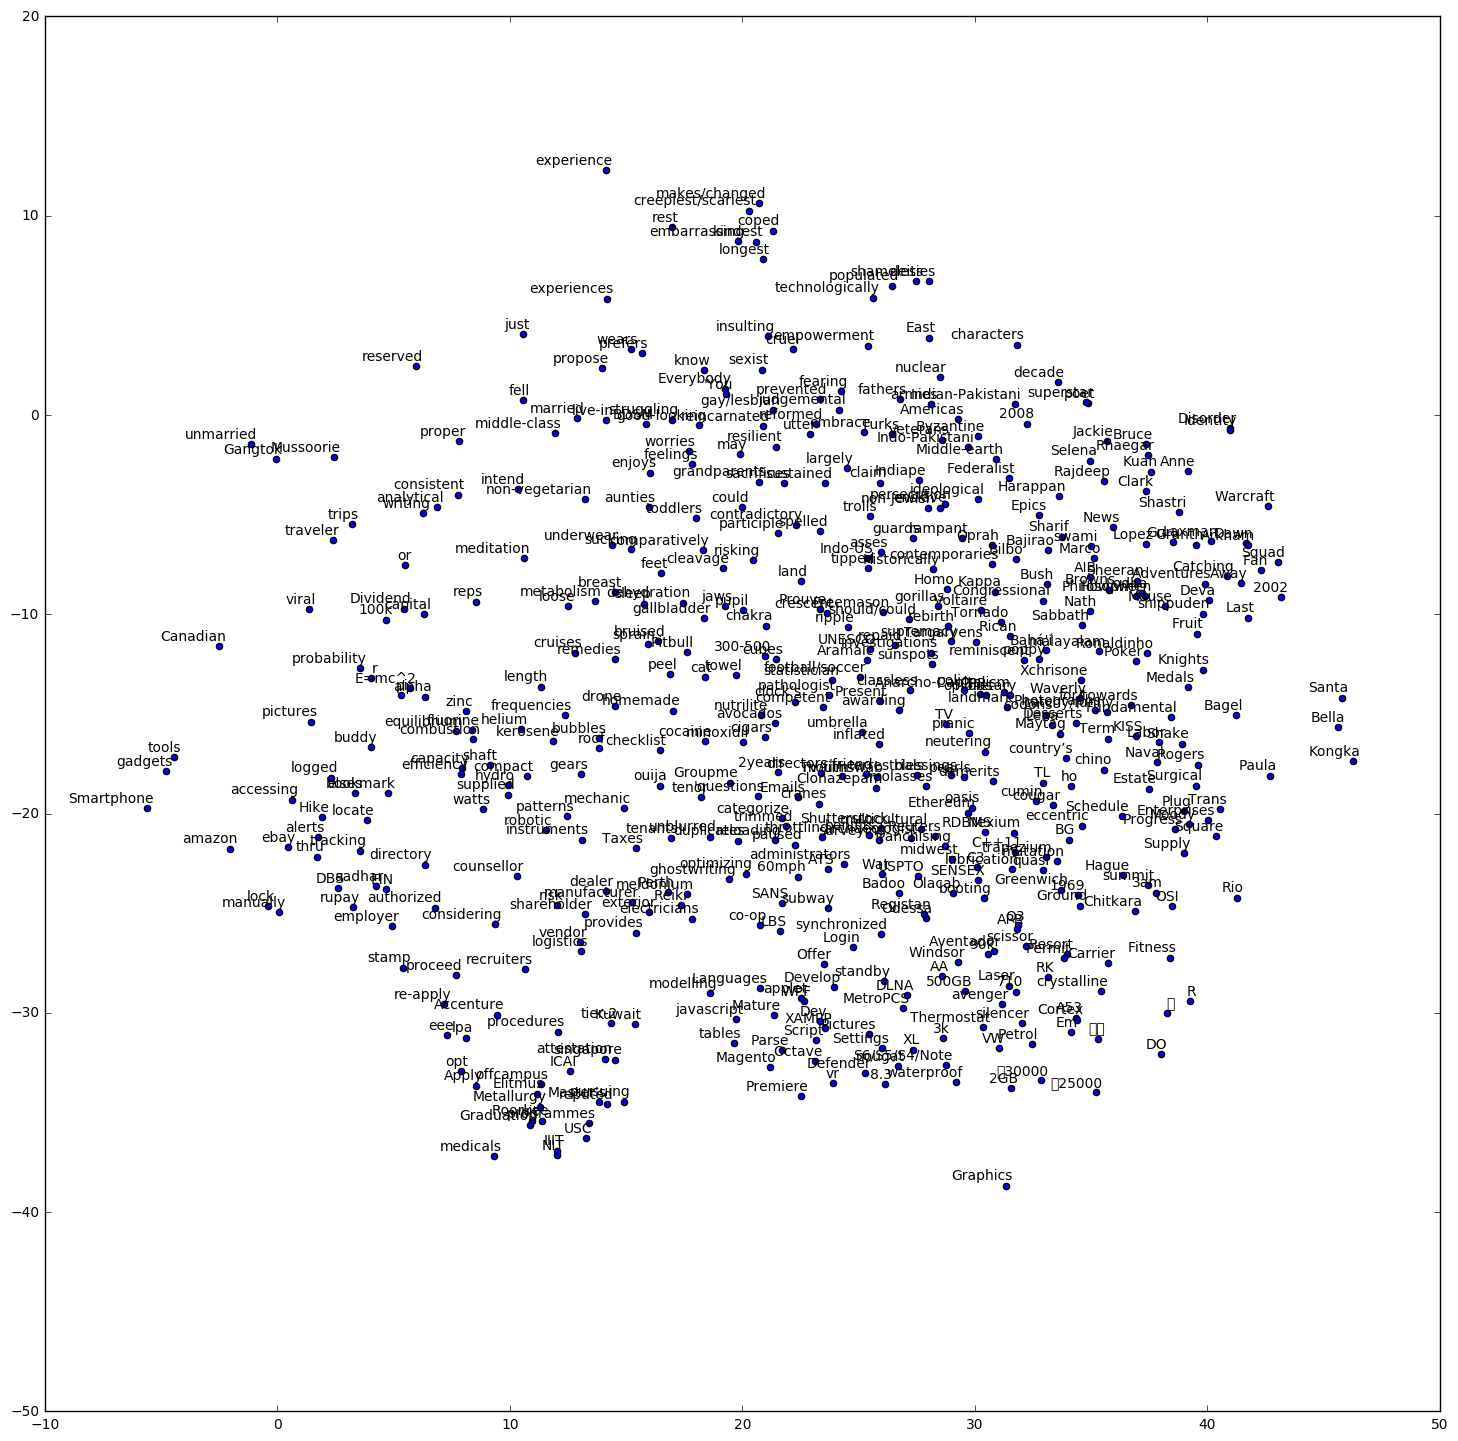

In [209]:
labels = [list(model_wv.wv.vocab.items())[i][0] for i in range(plot_only)]
plot_with_labels(low_dim_embs, labels)

## Glove
http://www-nlp.stanford.edu/pubs/glove.pdf – Jeffrey Pennington, Richard Socher, Christopher D. Manning 2014.
http://nlp.stanford.edu/projects/glove/ – pre-trained word vectors and some theory


### What is GloVe?
*GloVe* is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.
More detailed explanation https://blog.acolyer.org/2016/04/22/glove-global-vectors-for-word-representation/

![alt text](http://building-babylon.net/wp-content/uploads/2016/02/glove-matrix-factorisation-3.jpg)

### Difference with word2vec
Word2Vec and GloVe learn geometrical encodings (vectors) of words from their co-occurrence information (how frequently they appear together in large text corpora). They differ in that word2vec is a "predictive" model, whereas GloVe is a "count-based" model.

Predictive models learn their vectors in order to improve their predictive ability of Loss(target word | context words; Vectors), i.e. the loss of predicting the target words from the context words given the vector representations. In word2vec, this is cast as a feed-forward neural network and optimized as such using SGD, etc.

Count-based models learn their vectors by essentially doing dimensionality reduction on the co-occurrence counts matrix. They first construct a large matrix of (words x context) co-occurrence information, i.e. for each "word" (the rows), you count how frequently we see this word in some "context" (the columns) in a large corpus.  The number of "contexts" is of course large, since it is essentially combinatorial in size. So then they factorize this matrix to yield a lower-dimensional (word x features) matrix, where each row now yields a vector representation for each word. In general, this is done by minimizing a "reconstruction loss" which tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data. In the specific case of GloVe, the counts matrix is preprocessed by normalizing the counts and log-smoothing them. This turns out to be A Good Thing in terms of the quality of the learned representations.

However, as pointed out, when we control for all the training hyper-parameters, the embeddings generated using the two methods tend to perform very similarly in downstream NLP tasks. The additional benefits of GloVe over word2vec is that it is easier to parallelize the implementation which means it's easier to train over more data, which, with these models, is always A Good Thing.

### When to use?
Works better with neural nets, such as RNN/LSTM and CNN. On machine learning algorithms a result will be worse than on bag of words or on vectorizers.

In [186]:
import tf_glove
model_gl = tf_glove.GloVeModel(embedding_size=300, context_size=5, min_occurrences=5,
                            learning_rate=0.05, batch_size=100)
model_gl.fit_to_corpus(questions)

In [193]:
model_gl.train(num_epochs=50, log_dir="log/example", summary_batch_interval=1000)

Writing TensorBoard summaries to log/example


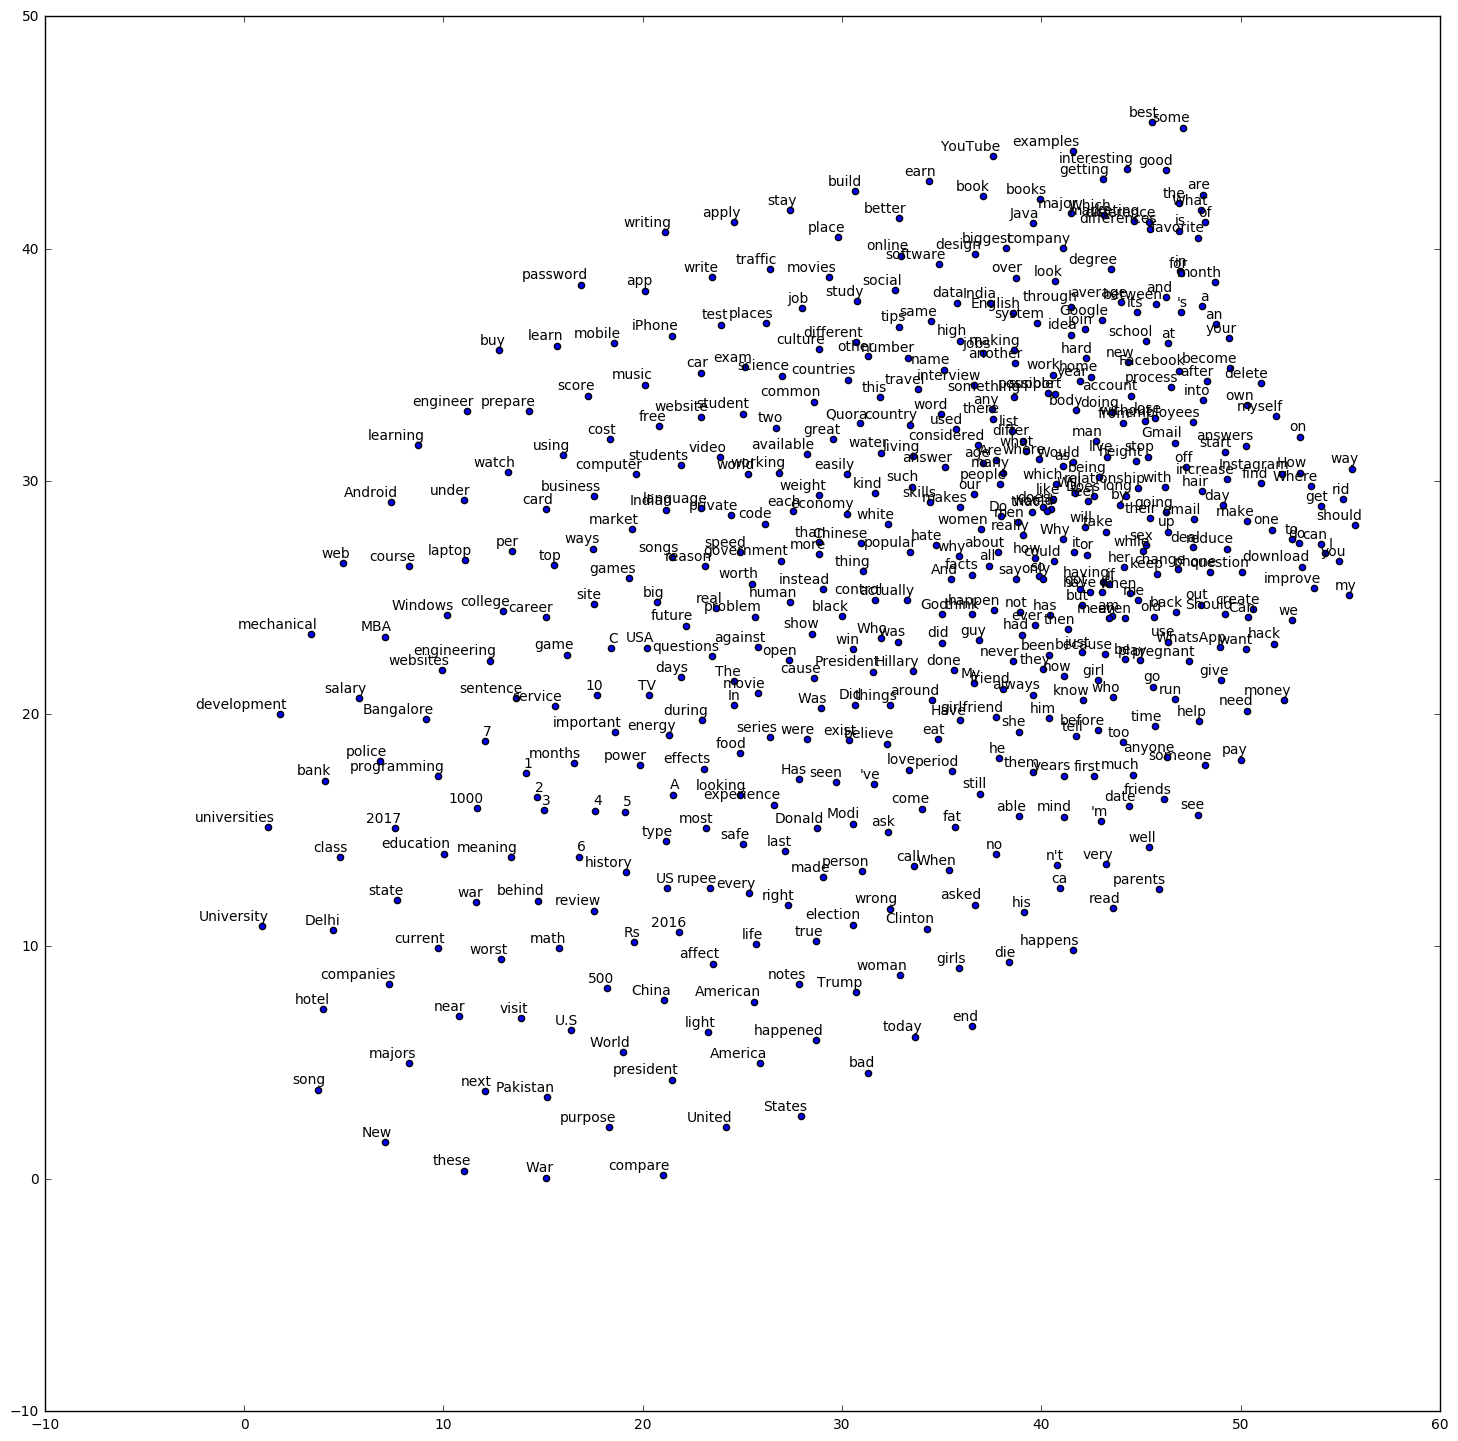

In [194]:
model_gl.generate_tsne(size=(18,18), word_count=500)

Another option is to use already pretrained word embeddings. Usually the best is Google word2vec pretrained on large new corpus with 6B tokens. 

### Synonyms

There are several approaches to get synonyms. First one is Wordnet from nltk.

In [195]:
from nltk.corpus import wordnet as wn
wn.synsets('EU')

[Synset('europium.n.01'), Synset('european_union.n.01')]

Second approach is **synonymscrawler**.

In [198]:
from synonymscrawler import simple_synonyms_crawler
def get_synonyms(x):
    try:
        return simple_synonyms_crawler.crawl(x, 3)
    except:
        return [x]
get_synonyms("EU")

['EU', 'European Economic Community', 'EEC']

In [199]:
get_synonyms("fine")

['fine', 'beautiful', 'outstanding']

Third approach – as cosine similarity between word embeddings.

In [210]:
model_wv.most_similar("fine")

[('ok', 0.5302084684371948),
 ('alright', 0.5261149406433105),
 ('crafts', 0.5104663372039795),
 ('allright', 0.5020143985748291),
 ('pad', 0.49991926550865173),
 ('redundant', 0.49974381923675537),
 ('weirdly', 0.49860066175460815),
 ('beeping', 0.49665725231170654),
 ("'that", 0.4957194924354553),
 ('unfortunately', 0.49490734934806824)]

In [211]:
model_wv.most_similar("EU")

[('monarchy', 0.6736621260643005),
 ('NATO', 0.6735842227935791),
 ('U.S.A', 0.6711561679840088),
 ('Schengen', 0.6648057699203491),
 ('USSR', 0.6633701920509338),
 ('referendum', 0.6619876027107239),
 ('European', 0.6555743217468262),
 ('Scotland', 0.6550090312957764),
 ('Ukraine', 0.6466418504714966),
 ('UK', 0.6406109929084778)]